In [1]:
from finlab.data import Data
import datetime
data = Data()
data.date = datetime.date(2018,5,5)

# 計算股價淨值比 Price/Book Ratio（pb）

In [2]:
# 先利用 data 取出需要的值
price = data.get('收盤價', 300)
股東權益 = data.get('歸屬於母公司業主之權益合計', 1)
股本 = data.get('普通股股本', 1)


# 股價淨值比 = 股價 / 每股淨值
# 每股淨值 = 股東權益 / 流通股數
# 流通股數 = 股本 / 10

流通股數 = 股本 / 10
每股淨值 = 股東權益 / 流通股數
今日股價 = price.iloc[-1]

股價淨值比pb = 今日股價 / 每股淨值
股價淨值比pb

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180355,2.459273,3.315665,2.435795,2.117123,0.711992,1.210691,0.739626,0.723754,4.281733


# 將股價淨值比 包裝成 function 直接使用

In [3]:
def 股價淨值比(n):
    
    股東權益 = data.get('歸屬於母公司業主之權益合計', n)
    股本 = data.get('普通股股本', n)
    price = data.get('收盤價', 100*n)
    
    # 算法跟剛剛非常類似，只是寫得比較快，不用往下深究啦XD，
    # 首先上面的公式，可以變成 股價淨值比 = 股價 / (股東權益/股本)/10
    # 然後因為 price 的頻率跟 股本 不一樣，所以必須
    return price.reindex(股本.index, method='ffill')/(股東權益/股本)/10

股價淨值比pb = 股價淨值比(4)
股價淨值比pb.head()

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.575570,2.473783,2.367390,2.424037,2.014284,0.735264,1.522931,0.625556,0.689223,0.754648
2017-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.373560,2.082022,3.250015,2.567019,2.070994,0.688095,1.150625,0.640006,0.686517,0.814871
2017-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.300088,2.259454,3.021190,2.591981,2.113597,0.689114,1.235983,0.611147,0.726228,1.249998
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.307073,2.485220,3.095484,2.529588,2.094110,0.728767,1.176198,0.692582,0.718547,6.454672


(0, 5)

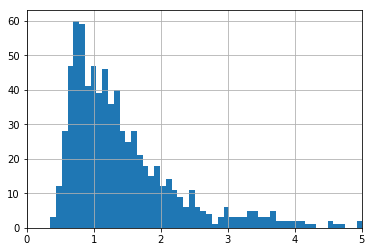

In [4]:
# 畫圖的起手式
import matplotlib.pyplot as plt
%matplotlib inline

# 找出最後一筆股價淨值比（第一條row）
起始股價淨值比pb = 股價淨值比pb.iloc[0]

# 畫出 histogram 分佈圖 （股價為x的股票有幾檔？）。設定 bins=1000 可以讓分佈圖切的更精細
# 調整 bins 為 2000 和 500 看看有什麼不一樣
起始股價淨值比pb.hist(bins=1000)

plt.xlim(0,5)

# X軸為股價淨值比，Y軸為股票的數量

In [8]:
import pandas as pd



結束股價 = price.iloc[-1] # 最後一筆股價
起始股價 = price.loc[股價淨值比pb.index[0]] # 淨值比公佈當天

起始股價淨值比 = 股價淨值比pb.iloc[0]

獲利 = (結束股價/起始股價 - 1) * 100

print('買入股價淨值比小於0.5的股票，與其獲利(%)：')
獲利[起始股價淨值比 < 0.5]

買入股價淨值比小於0.5的股票，與其獲利(%)：


stock_id
1314    15.068493
1806     9.286676
2038    71.035387
2323    68.194070
2362     9.778598
2515    23.327896
2611     7.886905
2841   -15.964126
3622    38.683128
3703    20.642202
4930   -13.768116
dtype: float64

In [9]:
# 條件
condition = (起始股價淨值比 < 0.5)

# 選出符合條件的股票
stocks = condition[condition].index

# 印出股票和其股價
stocks_price = price[stocks]
stocks_price.head()

stock_id,1314,1806,2038,2323,2362,2515,2611,2841,3622,3703,4930
date,,,,,,,,,,,
2017-02-15,12.25,7.66,7.71,4.13,29.25,6.86,7.50,11.30,13.90,10.90,15.60
2017-02-16,12.00,7.51,7.52,4.10,28.80,6.76,7.44,11.15,13.80,10.85,15.45
2017-02-17,12.00,7.50,7.58,4.10,29.10,6.77,7.37,11.10,13.90,10.85,15.40
2017-02-18,12.45,7.54,7.64,4.07,29.55,6.81,7.42,11.20,13.90,10.90,15.25
2017-02-20,12.10,7.61,7.59,4.02,29.30,6.76,7.46,11.00,14.25,10.90,15.05


# 持有一段時間 簡易回測

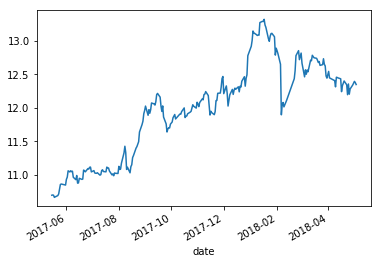

In [15]:
# 設定起始時間：我們看到 股價淨值比 的當下
start_time = 股價淨值比pb.index[0]

# 設定結束時間：我們股價最後一筆
end_time = price.index[-1]

# 將 stocks_price 的股價，選出時間段（start_time ~ end_time），將每天股票平均，並畫出來，當作是買入一籃子股票（類似於每檔買一張）
stocks_price.loc[start_time:end_time].mean(axis=1).plot()

# 跟上面一樣，但是將資產平均分散買入
#stock_price = stocks_price.loc[start_time:end_time]
#(stock_price/stock_price.iloc[0]).mean(axis=1).plot()